In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traffic.core import Traffic

#with open('', 'rb') as f:
#df_original = Traffic.from_file('./ecmwf_2019_10_to_2019_10.pkl')
#with open('./ecmwf_2019_10_to_2019_10.pkl', "rb") as f:
 #   df_original = pickle.load(f)
#df_2 = Traffic.from_file('./other_features_200.pkl')
#df_original = df_original + df_2
import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [2]:
df_original.loc['2019-10-02 09:00:00']

NameError: name 'df_original' is not defined

In [ ]:
import logging

# Enable logging
logging.basicConfig(level=logging.INFO)

In [3]:
import xarray
era5 = xarray.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)
era5

<xarray.Dataset> Size: 534TB
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 3kB ...
  * level                                             (level) int64 296B 1 .....
  * longitude                                         (longitude) float32 6kB ...
  * time                                              (time) datetime64[ns] 4MB ...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

In [ ]:
import numpy as np
subset = era5.sel(time=slice('2020-01-01 01:00:00', '2020-01-01 03:00:00'), latitude=slice(64.0, 38.0), 
                  longitude=slice(0.0, 20.0))
subset = subset[['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature','temperature',
                  'vertical_velocity', 'v_component_of_wind', 'u_component_of_wind'
                 #'geopotential', 
                 #'specific_humidity',  'total_cloud_cover', 'total_precipitation', 'total_column_water_vapour', 
                ]]
subset

In [6]:
import xarray
save_path = "/mnt/data/synthair/synthair_diffusion/data/era5/"
#subset.to_netcdf(save_path + 'era5_subset_2020_test_4.nc')

In [7]:
ds = xarray.open_dataset(save_path + 'era5_subset_2020-04.nc')
ds


<xarray.Dataset> Size: 4GB
Dimensions:                  (time: 720, latitude: 105, longitude: 81, level: 37)
Coordinates:
  * latitude                 (latitude) float32 420B 64.0 63.75 ... 38.25 38.0
  * level                    (level) int64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float32 324B 0.0 0.25 ... 19.75 20.0
  * time                     (time) datetime64[ns] 6kB 2020-04-01 ... 2020-04...
Data variables:
    10m_u_component_of_wind  (time, latitude, longitude) float32 24MB ...
    10m_v_component_of_wind  (time, latitude, longitude) float32 24MB ...
    2m_temperature           (time, latitude, longitude) float32 24MB ...
    temperature              (time, level, latitude, longitude) float32 906MB ...
    vertical_velocity        (time, level, latitude, longitude) float32 906MB ...
    v_component_of_wind      (time, level, latitude, longitude) float32 906MB ...
    u_component_of_wind      (time, level, latitude, longitude) float32 906MB ...
    total_precipitation      (time, latitude, longitude) float32 24MB ...
    total_cloud_cover        (time, latitude, longitude) float32 24MB ...

In [8]:
# Inspect the dataset
dssub = ds.sel(time='2020-04-26 17:00:00')
dssub

<xarray.Dataset> Size: 5MB
Dimensions:                  (latitude: 105, longitude: 81, level: 37)
Coordinates:
  * latitude                 (latitude) float32 420B 64.0 63.75 ... 38.25 38.0
  * level                    (level) int64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float32 324B 0.0 0.25 ... 19.75 20.0
    time                     datetime64[ns] 8B 2020-04-26T17:00:00
Data variables:
    10m_u_component_of_wind  (latitude, longitude) float32 34kB ...
    10m_v_component_of_wind  (latitude, longitude) float32 34kB ...
    2m_temperature           (latitude, longitude) float32 34kB ...
    temperature              (level, latitude, longitude) float32 1MB ...
    vertical_velocity        (level, latitude, longitude) float32 1MB ...
    v_component_of_wind      (level, latitude, longitude) float32 1MB ...
    u_component_of_wind      (level, latitude, longitude) float32 1MB ...
    total_precipitation      (latitude, longitude) float32 34kB ...
    total_cloud_cover        (latitude, longitude) float32 34kB ...

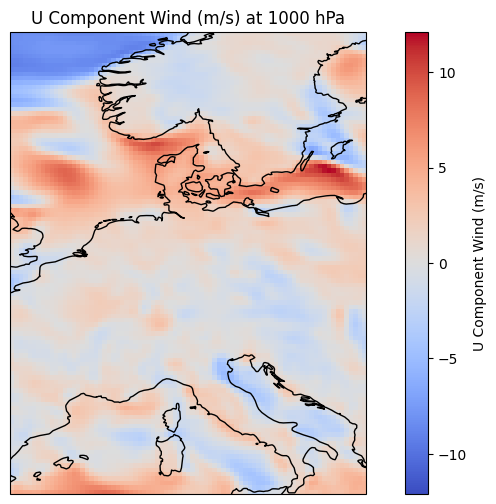

In [23]:
"""import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the dataset loaded
# ds = xr.open_zarr(...)

# Select the temperature at a specific pressure level, e.g., level 500 hPa
temperature_level = dssub['total_precipitation']#.sel(level=1000)# + -273.15
#temperature_level = dssub['wind'].sel(level=1000)# + -273.15
# Plotting the data on a map
plt.figure(figsize=(10, 6))

# Create a Cartopy projection for plotting (PlateCarree is the most common)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the temperature data
temperature_level.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Total Precipitation'})
#ax.set_clim(-50,50)
# Add coastlines for context
ax.coastlines()

# Show the plot
plt.title('Total Precipitation')
plt.show()"""

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_variable(ds, variable, level=None, cmap='coolwarm'):
    """
    Plots a specified variable from an xarray dataset with an optional level.
    
    Parameters:
    - ds: xarray.Dataset
        The dataset containing the variable to plot.
    - variable: str
        The variable name in the dataset to plot (e.g., 'total_precipitation', 'wind').
    - level: int, optional
        The pressure level to select (e.g., 500 for 500 hPa).
        If None, the level dimension will be ignored.
    - cmap: str, optional
        The colormap for the plot (default is 'coolwarm').
    """
    
    # Select the variable
    data = ds[variable]
    
    # If a level is provided and the dataset has a level dimension, select it
    if level is not None and 'level' in data.dims:
        data = data.sel(level=level)
    
    # Set labels based on variable type
    var_labels = {
        'total_precipitation': 'Total Precipitation (mm)',
        'wind': 'Wind (m/s)',
        'v_component_of_wind' : "V Component Wind (m/s)",
        'u_component_of_wind' : "U Component Wind (m/s)"
        # Add other variable names and labels as needed
    }
    label = var_labels.get(variable, variable)

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm", cbar_kwargs={'label': label})
    
    ax.coastlines()
    
    title = f"{label} {'at ' + str(level) + ' hPa' if level is not None else ''}"
    plt.title(title)
    plt.show()

#plot_variable(dssub, 'total_precipitation', level=1000)

# Without a specified level
plot_variable(dssub, 'u_component_of_wind', level=1000)

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traffic.core import Traffic

#with open('', 'rb') as f:
df_original = Traffic.from_file('./resampled/combined_traffic_resampled_200.pkl')
#df_2 = Traffic.from_file('./OpenSky_EGLL_EHAM_trajectories.pkl')
#df_original = df_original + df_2
import pandas as pd
import numpy as np
from geopy.distance import geodesic
df_original

In [ ]:
a = df_original.between("2020-01-01", "2020-01-31")
ds = xarray.open_dataset(save_path + 'era5_subset_2020-01.nc')
import torch
variables = ['v_component_of_wind', 'u_component_of_wind', 'temperature', 'vertical_velocity']
for flight in a:
    t = flight.mean("timestamp").round('h')
    formatted_timestamp = t.strftime('%Y-%m-%d %H:00:00')
    sub = ds[variables].sel(time=formatted_timestamp)
    print(sub)
    print(torch.tensor(sub.to_array().values).shape)
    break



In [ ]:
a = df_original.between("2020-01-01", "2020-01-31")
save_path = "/mnt/data/synthair/synthair_diffusion/data/era5/"
ds = xarray.open_dataset(save_path + 'era5_subset_2020-01.nc')
variables = ['v_component_of_wind', 'u_component_of_wind', 'temperature', 'vertical_velocity']
timestamps = []
pressure_levels = np.array([ 100,  150,  200,  250,  300,  400,  500,  600,  700,  850,  925, 1000])

for flight in a:
    # Calculate the mean timestamp and round to the nearest hour
    t = flight.mean("timestamp").round('h')
    formatted_timestamp = t.strftime('%Y-%m-%d %H:00:00')
    
    # Add the rounded timestamp to the list
    timestamps.append(formatted_timestamp)

# Step 2: Convert timestamps to a format that can be used for selection (if needed)
# Remove duplicates to get unique timestamps
unique_timestamps = np.unique(timestamps)

# Step 3: Use these timestamps to subset the ERA5 dataset
# Subset the dataset with all timestamps that match
sub_ds = ds.sel(time=unique_timestamps).sel(level = pressure_levels)

# Now, 'sub_ds' is the subset containing only the data for the relevant flight timestamps
print(sub_ds)

# Optionally save the subset dataset for later use
sub_ds.to_netcdf(save_path + 'era5_2020-01_flight_filtered.nc')

In [ ]:
import xarray as xr
import numpy as np
import plotly.graph_objects as go

# Assuming you already have the dataset loaded
# ds = xr.open_zarr(...)

# Pressure levels array you provided
pressure_levels = np.array([1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000])
pressure_levels = np.array([ 100,  150,  200,  250,  300,  400,  500,  600,  700,  850,  925, 1000])

# Prepare a grid for the latitude, longitude, and pressure levels
lats = dssub['latitude'].values
lons = dssub['longitude'].values

# Create 2D grids for lat and lon
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Create a figure for the 3D plot
fig = go.Figure()

# Iterate over the pressure levels and plot each one with transparency
for pressure in pressure_levels:
    # Select the temperature at the current pressure level, converting from Kelvin to Celsius
    temperature_level = dssub['u_component_of_wind'].sel(level=pressure).values
    
    # Add a surface plot for each pressure level
    fig.add_trace(go.Surface(
        x=lon_grid,
        y=lat_grid,
        z=np.full_like(lon_grid, pressure),  # Pressure as the Z axis
        surfacecolor=temperature_level,  # Temperature mapped to color
        colorscale='RdBu',  # Use a suitable colormap (coolwarm is not directly available, so we use 'RdBu')
        opacity=0.6,  # Set the transparency
        colorbar=dict(title='10m_u_component_of_wind (°C)'),
        showscale=False  # Disable individual colorbars for each surface
    ))

# Set labels and titles
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Pressure Level (hPa)',
        zaxis=dict(autorange='reversed')  # Reverse the Z axis for pressure
    ),
    title='Temperature across Pressure Levels (with Transparency)',
    coloraxis_colorbar=dict(title='10m_u_component_of_wind (°C)')
)

# Add a single colorbar for the whole plot
fig.update_layout(coloraxis_colorbar=dict(title="10m_u_component_of_wind (°C)"))

# Show the interactive plot
fig.show()


In [5]:
df_2 = Traffic.from_file('./resampled/combined_traffic_resampled_200.pkl')
df_2

,count
flight_id,
300064_AZA107_20180529_102200,200
484b92_KLM81K_20210825_081600,200
484c59_KLM41L_20181223_180619,200
484c59_KLM41L_20181112_162318,200
484c59_KLM41L_20181111_161923,200
484c59_KLM41L_20181109_162100,200
484c59_KLM41L_20181108_160756,200
484c59_KLM41L_20181106_160931,200
484c59_KLM41L_20181105_161034,200


In [31]:
import os
import xarray as xr
variables = ['v_component_of_wind', 'u_component_of_wind', 'temperature', 'vertical_velocity']
pressure_levels = np.array([ 100,  150,  200,  250,  300,  400,  500,  600,  700,  850,  925, 1000])
pressure_levels = np.array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])
def preprocess(ds):
    return ds[variables].sel(level=pressure_levels)

save_path = "/mnt/data/synthair/synthair_diffusion/data/era5/"
# List all .nc files in the directory
nc_files = [save_path + f for f in os.listdir(save_path) if f.endswith('.nc') and not "2021" in f]
print(nc_files)
# Open all the .nc files in the directory as a single dataset
ds = xr.open_mfdataset(nc_files, combine='by_coords', preprocess=preprocess, decode_cf=True)
print("loaded_data")
ds

['/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2020-12.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2020-06.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2020-07.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2019-11.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2020-04.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2020-03.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2019-02.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2018-03.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2018-06.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2019-01.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2018-02.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2019-07.nc', '/mnt/data/synthair/synthair_diffusion/data/era5/era5_subset_2018-11.nc', '/mnt/data/synthair/synthair_diffusio

/home/olavfpl/SynTraj/syntraj/lib/python3.10/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset> Size: 132GB
Dimensions:              (time: 26304, level: 37, latitude: 105, longitude: 81)
Coordinates:
  * latitude             (latitude) float32 420B 64.0 63.75 63.5 ... 38.25 38.0
  * level                (level) int64 296B 1 2 3 5 7 ... 900 925 950 975 1000
  * longitude            (longitude) float32 324B 0.0 0.25 0.5 ... 19.75 20.0
  * time                 (time) datetime64[ns] 210kB 2018-01-01 ... 2020-12-3...
Data variables:
    v_component_of_wind  (time, level, latitude, longitude) float32 33GB dask.array<chunksize=(744, 37, 105, 81), meta=np.ndarray>
    u_component_of_wind  (time, level, latitude, longitude) float32 33GB dask.array<chunksize=(744, 37, 105, 81), meta=np.ndarray>
    temperature          (time, level, latitude, longitude) float32 33GB dask.array<chunksize=(744, 37, 105, 81), meta=np.ndarray>
    vertical_velocity    (time, level, latitude, longitude) float32 33GB dask.array<chunksize=(744, 37, 105, 81), meta=np.ndarray>

In [51]:
import torch
from tqdm import tqdm
def pad_or_crop_grid(grid, target_shape):
    """
    Pads or crops the grid to match the target shape (variables, levels, grid_size, grid_size).
    
    Args:
        grid (numpy.ndarray): Input array of shape (variables, levels, grid_size, grid_size).
        target_shape (tuple): Target shape (target_vars, target_levels, target_grid_size, target_grid_size).
        
    Returns:
        numpy.ndarray: The padded or cropped grid.
    """
    target_vars, target_levels, target_rows, target_cols = target_shape
    current_vars, current_levels, current_rows, current_cols = grid.shape

    # Pad or crop variables
    if current_vars < target_vars:
        pad_vars = target_vars - current_vars
        grid = np.pad(grid, ((0, pad_vars), (0, 0), (0, 0), (0, 0)), mode='constant')
    elif current_vars > target_vars:
        grid = grid[:target_vars, :, :, :]

    # Pad or crop levels
    if current_levels < target_levels:
        pad_levels = target_levels - current_levels
        grid = np.pad(grid, ((0, 0), (0, pad_levels), (0, 0), (0, 0)), mode='constant')
    elif current_levels > target_levels:
        grid = grid[:, :target_levels, :, :]

    # Pad or crop rows
    if current_rows < target_rows:
        pad_rows = target_rows - current_rows
        grid = np.pad(grid, ((0, 0), (0, 0), (0, pad_rows), (0, 0)), mode='constant')
    elif current_rows > target_rows:
        grid = grid[:, :, :target_rows, :]

    # Pad or crop columns
    if current_cols < target_cols:
        pad_cols = target_cols - current_cols
        grid = np.pad(grid, ((0, 0), (0, 0), (0, 0), (0, pad_cols)), mode='constant')
    elif current_cols > target_cols:
        grid = grid[:, :, :, :target_cols]

    return grid

def retrieve_closest_pressure(pressure_hPa, pressure_levels = np.array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])):
    """ Retrieve the closest pressure level in the ERA5 dataset to the given pressure
    Args:
        pressure_hPa: float
    """
    return min(pressure_levels, key=lambda x:abs(x-pressure_hPa))

def hPa_to_m(pressure_hPa):
    """ Convert pressure in hPa to meters
    Args:
        pressure_hPa: float
    """
    return 145366.45 * (1 - (pressure_hPa / 1013.25)**0.190284)

def m_to_hPa(altitude_m):
    """ Convert altitude in meters to hPa
    Args:
        altitude_m: float
    """
    return 1013.25 * (1 - 2.2577e-5 * altitude_m )**5.25588

def find_nearest_pressure_levels(altitude, num_levels, pressure_levels = np.array([   1,    2,    3,    5,    7,   10,   20,   30,   50,   70,  100,  125,
        150,  175,  200,  225,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  775,  800,  825,  850,  875,  900,  925,  950,  975,
       1000])):
    """ 
    Map an altitude to the nearest available pressure level and return surrounding levels.
    
    Args:
        altitude: float, altitude in meters
        num_levels: int, number of levels to retrieve (total number, so num_levels // 2 above and below)
        pressure_levels: numpy array of available pressure levels in hPa
    
    Returns:
        list: Sorted list of pressure levels including the nearest and surrounding levels.
    """
    # Convert altitude to pressure (if needed), here using a placeholder conversion for example
    pressure_hPa = m_to_hPa(altitude)  # Convert altitude (meters) to pressure in hPa
    
    # Find the index of the nearest pressure level
    closest_index = np.abs(pressure_levels - pressure_hPa).argmin()
    
    # Calculate the range of indices to select surrounding levels
    half_num_levels = num_levels // 2
    start_index = max(0, closest_index - half_num_levels)
    end_index = min(len(pressure_levels), closest_index + half_num_levels + 1)  # +1 to include the end index
    
    # Select surrounding pressure levels
    selected_levels = pressure_levels[start_index:end_index]
    
    return selected_levels

def round_to_nearest_0_25(value):
    """Round the input value to the nearest 0.25."""
    return round(value * 4) / 4

for flight in df_2:
    # Extracting the average time for the flight and rounding it to the nearest hour
    t = flight.mean("timestamp").round('h')
    formatted_timestamp = t.strftime('%Y-%m-%d %H:00:00')
    
    # Select sub-dataset for the timestamp
    sub = ds.sel(time=formatted_timestamp)
    
    flight_grids = []
    num_levels = 3
    grid_size = 5

    for i in tqdm(range(len(flight))):
        point = flight.data.loc[i]
        lon, lat, alt = point['longitude'], point['latitude'], point['altitude']
        
        nearest_levels = find_nearest_pressure_levels(alt, num_levels)
        rounded_lon = round_to_nearest_0_25(lon)
        rounded_lat = round_to_nearest_0_25(lat)

        half_grid = grid_size // 2 * 0.25
        #print(slice(rounded_lon - half_grid, rounded_lon + half_grid, 0.25))
        #print(slice(rounded_lat - half_grid, rounded_lat + half_grid, 0.25))
        #print(sub)
        grid = sub.sel(
            longitude=slice(rounded_lon - half_grid, rounded_lon + half_grid), 
            latitude=slice(rounded_lat + half_grid, rounded_lat - half_grid), 
            level=nearest_levels  # Use the pressure levels obtained from the previous step
        ).to_array().fillna(0).values  # Filling NaNs with 0

        #print("GRID SHAPE:", grid.shape)
        # Ensure the grid shape is (num_levels, grid_size, grid_size)
        if grid.shape[2:4] != (grid_size, grid_size) or grid.shape[1] != num_levels:
            # Handle cases where grid extraction may be smaller due to boundaries
            grid = pad_or_crop_grid(grid, target_shape=(4, num_levels, grid_size, grid_size))
        flight_grids.append((torch.FloatTensor(grid), (lon, lat, alt)))
    break

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [06:32<00:00,  1.96s/it]


In [37]:
t_fg = torch.stack(flight_grids, dim=0)
t_fg.shape

torch.Size([200, 4, 3, 5, 5])

In [49]:
t_fg[:][0][0]

tensor([[[1.6954, 1.6022, 1.4733, 1.3357, 1.2663],
         [1.6022, 1.5817, 1.5069, 1.4169, 1.4137],
         [1.8114, 1.8981, 1.8710, 1.7724, 1.7431],
         [2.1777, 2.3088, 2.2752, 2.1376, 2.0195],
         [2.4583, 2.5418, 2.4941, 2.3532, 2.1430]],

        [[1.0667, 1.2133, 1.2922, 1.2867, 1.2626],
         [1.3261, 1.5538, 1.6457, 1.6019, 1.5428],
         [1.8165, 2.0737, 2.1219, 2.0124, 1.9259],
         [2.3386, 2.5301, 2.5181, 2.3802, 2.2346],
         [2.6451, 2.7589, 2.7458, 2.6210, 2.3824]],

        [[0.3349, 0.6814, 0.9464, 1.1356, 1.2709],
         [0.7836, 1.2038, 1.4523, 1.5304, 1.5447],
         [1.3820, 1.7625, 1.9198, 1.9033, 1.8659],
         [1.9220, 2.1672, 2.2189, 2.1595, 2.0836],
         [2.2508, 2.3531, 2.3245, 2.2409, 2.1100]]])

TypeError: Invalid shape (3, 5, 5) for image data

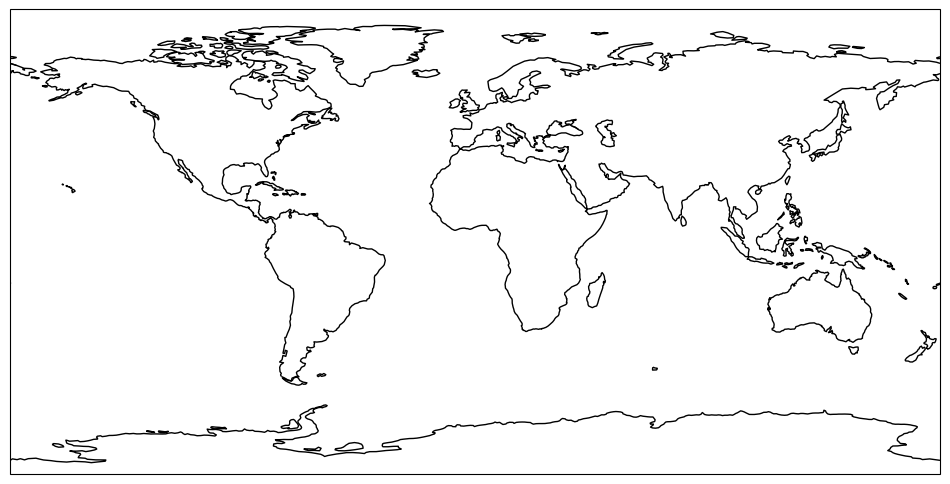

In [60]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_weather_grids_on_trajectory(flight_grids, label="Weather Variable", alpha=0.3, level=None, grid_size=5):
    """
    Plots the weather grids overlaid on a map based on the flight trajectory.
    
    Args:
        flight_grids (list): List of tuples where each tuple contains:
                              - a tensor of shape (level, lon, lat) representing the weather grid.
                              - a tuple (lon, lat, alt) for the flight's location.
        label (str): Label for the weather variable (for the colorbar).
        alpha (float): Transparency level for plotting the grids.
        level (int, optional): The pressure level to display (if provided).
        grid_size (int): Size of the grid (e.g., 5x5).
    """
    # Create a figure with Cartopy projection
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Set up a color map
    cmap = "coolwarm"
    
    # Initialize variables to track the min and max values for the colorbar
    all_data = []

    # Loop through all flight grids and collect data to determine the global min/max
    for grid, (lon, lat, alt) in flight_grids:
        # Select the weather grid at the specified altitude (level)
        data = grid[2][0]  # Assuming that grid has the shape (level, lon, lat), and we take the first level
        all_data.append(data)

    # Flatten all the data and calculate the global min/max for color scaling
    all_data = torch.cat(all_data, dim=-1).flatten()
    vmin = all_data.min().item()
    vmax = all_data.max().item()

    # Now loop through the flight grids and plot each one
    for grid, (lon, lat, alt) in flight_grids:
        # Select the weather grid at the specified altitude (level)
        data = grid[0]  # Assuming that grid has the shape (level, lon, lat), and we take the first level
        
        # Calculate the extent for the grid to be placed at the correct (lon, lat) location
        half_grid = grid_size / 2.0
        extent = [lon - half_grid, lon + half_grid, lat - half_grid, lat + half_grid]

        # Plotting the grid
        im = ax.imshow(data, transform=ccrs.PlateCarree(), cmap=cmap, 
                       alpha=alpha, extent=extent, origin='lower', vmin=vmin, vmax=vmax)

        # Mark the position on the flight trajectory with a red dot
        ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())

        # Optionally annotate the altitude
        ax.text(lon + 1, lat + 1, f"{int(alt)} m", fontsize=8, color="black", transform=ccrs.PlateCarree())

    # Set the title of the plot
    title = f"{label} {'at ' + str(level) + ' hPa' if level is not None else ''}"
    plt.title(f"Weather Grids Along Flight Trajectory: {title}")

    # Add a colorbar
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
    cbar.set_label(label)
    
    plt.show()

# Example usage
# Assuming `t_fg` is a list-like object containing data with shape (level, longitude, latitude)
plot_weather_grids_on_trajectory(flight_grids, label="Temperature", level=500)